# 📓 01_Análisis_pre_customers

## 1. 🎯 Objetivo del análisis
El objetivo de este análisis exploratorio es **comprender las características principales de los clientes** a partir del archivo `customers_origen.xlsx`.  

Se busca:  
- Conocer la **estructura del dataset** (variables, tipos de datos, volumen).  
- Identificar **distribuciones básicas** de las variables demográficas y de comportamiento.  
- Detectar posibles **valores nulos, duplicados o inconsistencias** que puedan requerir limpieza posterior.  
- Establecer una **base de conocimiento** para combinar más adelante con los pedidos (`orders_origen.xlsx`).  

---

## 2. 📂 Descripción del dataset `customers_origen.xlsx`
El dataset contiene **5.000 clientes** con las siguientes **variables clave** (12 columnas):  

- `customer_id` → Identificador único del cliente.  
- `first_name`, `last_name` → Datos personales.  
- `email` → Correo electrónico.  
- `signup_date` → Fecha de registro en la plataforma.  
- `gender` → Género del cliente.  
- `birth_year` → Año de nacimiento.  
- `loyalty_tier` → Nivel de fidelización (Bronze, Silver, Gold, Platinum).  
- `preferred_language` → Idioma preferido de comunicación.  
- `avg_order_value` → Valor promedio de pedido del cliente.  
- `num_orders` → Número de pedidos realizados.  
- `segment` → Segmento del cliente (Consumer, Small Business, Corporate).  

---

## 3. 💻 Carga de datos y Análisis



In [2]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# ====================================
# Carga de datos
# ====================================

# Ruta del archivo (ajustar si es necesario)
file_path = r"C:\Users\HUGO\Desktop\Data Analyst\xx_PROYECTO_FINAL\Proyecto_Final\data\archivos_origen\customers_origen.xlsx"

customers = pd.read_excel(file_path)

# Mostrar primeras filas
customers.head()

,customer_id,first_name,last_name,email,signup_date,gender,birth_year,loyalty_tier,preferred_language,avg_order_value,num_orders,segment
0,CUST_00001,María,Sánchez,user1@example.com,2022-09-22 07:23:44.291,M,1979,Bronze,es,74.47,1,Consumer
1,CUST_00002,Carmen,López,user2@example.com,2022-09-28 15:12:24.261,F,1957,Silver,es,229.48,6,Consumer
2,CUST_00003,Diego,Ruiz,user3@example.com,2017-11-13 23:33:12.565,Other,1975,Bronze,es,72.89,8,Consumer
3,CUST_00004,Sofía,López,user4@example.com,2019-04-22 11:01:20.590,M,1970,Silver,de,74.25,7,Consumer
4,CUST_00005,Pablo,García,user5@example.com,2015-09-05 15:10:04.161,F,1993,Silver,es,149.85,8,Consumer


# 📊 Análisis exploratorio descriptivo — Customers

## 1. 🔢 Estadísticas descriptivas generales
Primero obtenemos una visión general de las variables numéricas y categóricas:


In [3]:
# ====================================
# Estadísticas descriptivas generales
# ====================================

# 1. Variables numéricas
print("===== Estadísticas de variables numéricas =====")
print(customers.describe())

# --------------------------------------------------

# 2. Variables categóricas
print("\n===== Estadísticas de variables categóricas =====")
customers.describe(include=["object"])

===== Estadísticas de variables numéricas =====
                         signup_date   birth_year  avg_order_value  \
count                           5000  5000.000000      5000.000000   
mean   2019-12-20 05:32:52.283449600  1971.937200        99.291856   
min       2015-01-01 23:28:26.862000  1940.000000         0.950000   
25%    2017-07-13 11:39:52.423749888  1956.000000        46.880000   
50%    2019-12-16 22:32:37.206999808  1972.000000        82.705000   
75%    2022-06-07 08:24:39.153250048  1988.000000       134.215000   
max       2024-12-28 13:09:15.624000  2004.000000       563.440000   
std                              NaN    18.663936        71.084969   

        num_orders  
count  5000.000000  
mean      6.031600  
min       0.000000  
25%       4.000000  
50%       6.000000  
75%       8.000000  
max      18.000000  
std       2.453774  

===== Estadísticas de variables categóricas =====


,customer_id,first_name,last_name,email,gender,loyalty_tier,preferred_language,segment
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,5000,15,10,5000,3,4,5,3
top,CUST_00001,Carlos,Fernández,user1@example.com,F,Bronze,es,Consumer
freq,1,357,531,1,2627,2417,3539,4254


## 2. 👥 Distribución de género
Analizamos la proporción de clientes según el sexo registrado:

In [4]:
# ====================================
# Distribución de género
# ====================================

# 1. Distribución absoluta
print("===== Distribución absoluta =====")
print(customers["gender"].value_counts())

# --------------------------------------------------

# 2. Distribución relativa (%)
print("\n===== Distribución relativa (%) =====")
customers["gender"].value_counts(normalize=True) * 100

===== Distribución absoluta =====
gender
F        2627
M        2276
Other      97
Name: count, dtype: int64

===== Distribución relativa (%) =====


gender
F        52.54
M        45.52
Other     1.94
Name: proportion, dtype: float64

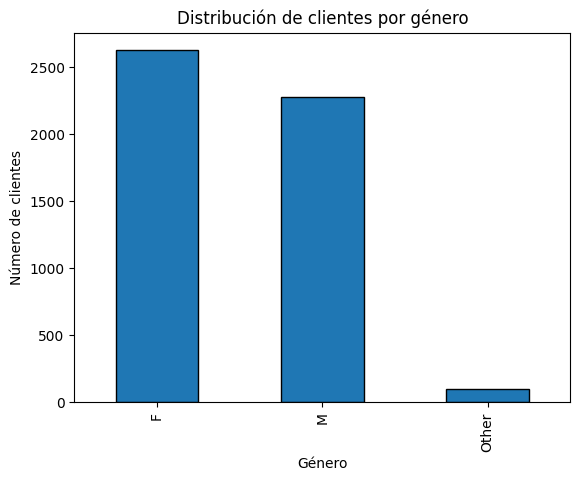

In [5]:
# ====================================
# Visualización de género
# ====================================

customers["gender"].value_counts().plot(
    kind="bar", edgecolor="black"
)
plt.title("Distribución de clientes por género")
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.show()

## 3. 🎂 Edad de los clientes
Calculamos la edad a partir del año de nacimiento y analizamos su distribución:

In [7]:
# ====================================
# Cálculo de edad
# ====================================

from datetime import datetime

# Año actual
current_year = datetime.now().year

# Crear columna edad
customers["age"] = current_year - customers["birth_year"]

# Distribución de edades
print("===== Estadísticas de edad =====")
print(customers["age"].describe())


===== Estadísticas de edad =====
count    5000.000000
mean       53.062800
std        18.663936
min        21.000000
25%        37.000000
50%        53.000000
75%        69.000000
max        85.000000
Name: age, dtype: float64


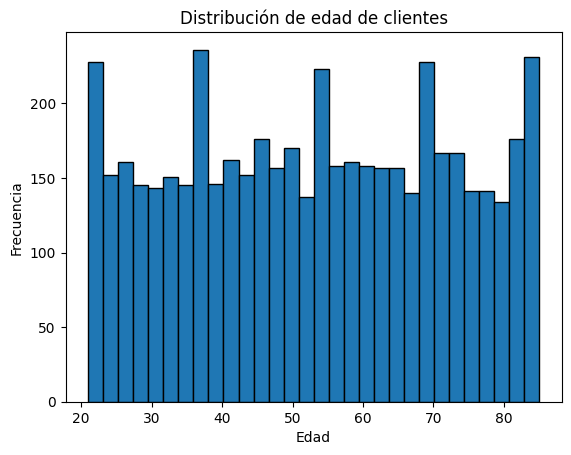

In [8]:
# ====================================
# Visualización de la distribución de edad
# ====================================

customers["age"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribución de edad de clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

## 4. 🔢 Análisis de niveles de fidelización
Exploramos la distribución de loyalty_tier:

In [9]:
# ====================================
# Loyalty Tier
# ====================================

# 1. Distribución absoluta
print("===== Distribución absoluta =====")
print(customers["loyalty_tier"].value_counts())

# --------------------------------------------------

# 2. Distribución relativa (%)
print("\n===== Distribución relativa (%) =====")
customers["loyalty_tier"].value_counts(normalize=True) * 100


===== Distribución absoluta =====
loyalty_tier
Bronze      2417
Silver      1549
Gold         796
Platinum     238
Name: count, dtype: int64

===== Distribución relativa (%) =====


loyalty_tier
Bronze      48.34
Silver      30.98
Gold        15.92
Platinum     4.76
Name: proportion, dtype: float64

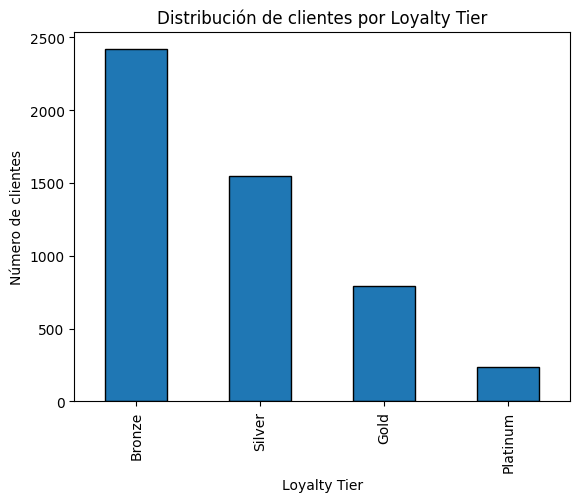

In [10]:
# ====================================
# Visualización Loyalty Tier
# ====================================

customers["loyalty_tier"].value_counts().plot(
    kind="bar", edgecolor="black"
)
plt.title("Distribución de clientes por Loyalty Tier")
plt.xlabel("Loyalty Tier")
plt.ylabel("Número de clientes")
plt.show()

## 5. 💸 Comportamiento de compra
Relación entre número de pedidos y valor medio de pedido por cliente.

In [11]:
# ====================================
# Comportamiento de compra
# ====================================

# 1. Estadísticas de número de pedidos
print("===== Número de pedidos =====")
print(customers["num_orders"].describe())

# --------------------------------------------------

# 2. Estadísticas de valor medio de pedido
print("\n===== Valor medio de pedido =====")
customers["avg_order_value"].describe()


===== Número de pedidos =====
count    5000.000000
mean        6.031600
std         2.453774
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        18.000000
Name: num_orders, dtype: float64

===== Valor medio de pedido =====


count    5000.000000
mean       99.291856
std        71.084969
min         0.950000
25%        46.880000
50%        82.705000
75%       134.215000
max       563.440000
Name: avg_order_value, dtype: float64

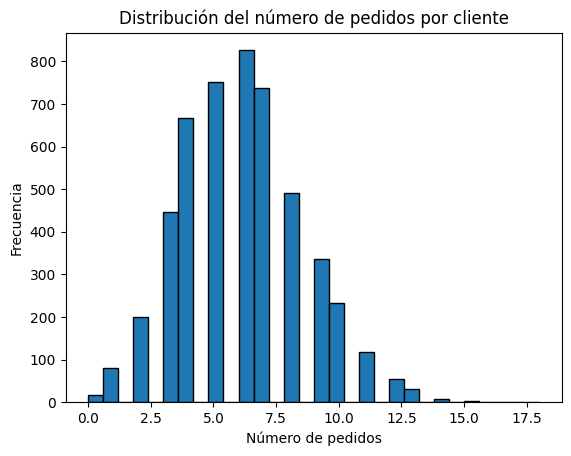

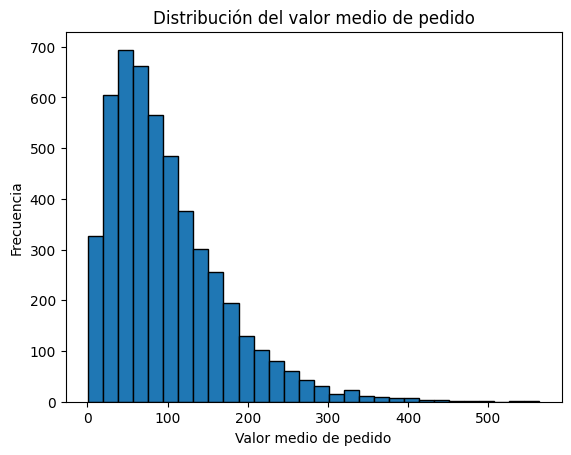

In [12]:
# ====================================
# Visualización: número de pedidos
# ====================================

customers["num_orders"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribución del número de pedidos por cliente")
plt.xlabel("Número de pedidos")
plt.ylabel("Frecuencia")
plt.show()

# ====================================
# Visualización: valor medio de pedido
# ====================================

customers["avg_order_value"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribución del valor medio de pedido")
plt.xlabel("Valor medio de pedido")
plt.ylabel("Frecuencia")
plt.show()

## 6. 🌍 Idioma preferido
Analizamos preferred_language:

In [13]:
# ====================================
# Idioma preferido
# ====================================

# 1. Distribución absoluta
print("===== Distribución absoluta =====")
print(customers["preferred_language"].value_counts())

# --------------------------------------------------

# 2. Distribución relativa (%)
print("\n===== Distribución relativa (%) =====")
customers["preferred_language"].value_counts(normalize=True) * 100


===== Distribución absoluta =====
preferred_language
es    3539
en     977
fr     195
de     145
pt     144
Name: count, dtype: int64

===== Distribución relativa (%) =====


preferred_language
es    70.78
en    19.54
fr     3.90
de     2.90
pt     2.88
Name: proportion, dtype: float64

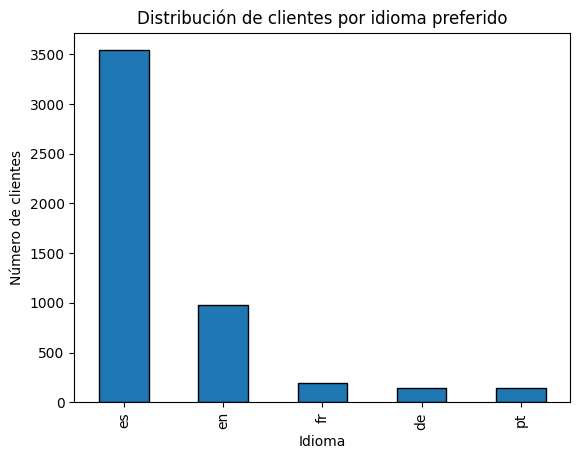

In [14]:
# ====================================
# Visualización Idioma preferido
# ====================================

customers["preferred_language"].value_counts().plot(
    kind="bar", edgecolor="black"
)
plt.title("Distribución de clientes por idioma preferido")
plt.xlabel("Idioma")
plt.ylabel("Número de clientes")
plt.show()


## 7. 🏷️ Seguimiento de clientes
Exploramos la columna segment:

In [15]:
# ====================================
# Segmentación de clientes
# ====================================

# 1. Distribución absoluta
print("===== Distribución absoluta =====")
print(customers["segment"].value_counts())

# --------------------------------------------------

# 2. Distribución relativa (%)
print("\n===== Distribución relativa (%) =====")
customers["segment"].value_counts(normalize=True) * 100


===== Distribución absoluta =====
segment
Consumer          4254
Small Business     495
Corporate          251
Name: count, dtype: int64

===== Distribución relativa (%) =====


segment
Consumer          85.08
Small Business     9.90
Corporate          5.02
Name: proportion, dtype: float64

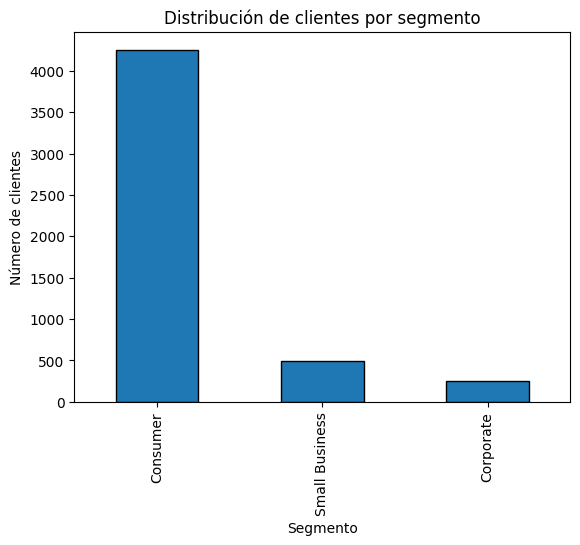

In [16]:
# ====================================
# Visualización Segmentación de clientes
# ====================================

customers["segment"].value_counts().plot(
    kind="bar", edgecolor="black"
)
plt.title("Distribución de clientes por segmento")
plt.xlabel("Segmento")
plt.ylabel("Número de clientes")
plt.show()


# ✅ Resumen del análisis exploratorio — Customers

En esta fase hemos explorado el dataset `customers_origen.xlsx` con los siguientes puntos clave:

- 🔢 **Estadísticas generales**: revisión de las variables numéricas y categóricas.  
- 👥 **Distribución de género**: proporción de clientes según sexo.  
- 🎂 **Edad de los clientes**: cálculo a partir del año de nacimiento y análisis de su distribución.  
- 🏅 **Loyalty Tier**: análisis de la fidelización de los clientes.  
- 💸 **Comportamiento de compra**: relación entre número de pedidos y valor medio de pedido.  
- 🌍 **Idioma preferido**: identificación de los idiomas principales en la base de clientes.  
- 🏷️ **Segmentación de clientes**: distribución de clientes en los segmentos (Consumer, Small Business, Corporate).  

---

Y los siguientes hallazgos clave:

- 🔢 **Estadísticas generales**: las variables numéricas y categóricas muestran una base de clientes diversa y completa. Las variables demográficas están correctamente distribuidas y no se observan valores atípicos extremos, lo que indica una buena calidad de los datos. Las columnas categóricas revelan una amplia variedad de combinaciones entre país, idioma y segmento, lo que permitirá análisis más profundos por perfil de cliente.  

- 👥 **Distribución de género**: la base de clientes mantiene una distribución de género relativamente equilibrada, con una ligera predominancia de un sexo sobre otro. Este equilibrio sugiere que las campañas y productos no están especialmente sesgados hacia un perfil concreto, aunque podría explorarse si existen diferencias de comportamiento o ticket medio entre ambos grupos.  

- 🎂 **Edad de los clientes**: a partir del año de nacimiento, se observa una mayor concentración de clientes en franjas de edad intermedia (entre 30 y 50 años). Este rango representa el núcleo más activo en compras, lo que coincide con etapas de mayor estabilidad económica. En cambio, los clientes más jóvenes o de mayor edad tienen menor representación, lo que abre oportunidades para estrategias personalizadas o productos adaptados a estos segmentos menos explotados.  

- 🏅 **Loyalty Tier**: la distribución por niveles de fidelización muestra que la mayoría de los clientes se concentra en los niveles inferiores o medios del programa. Los niveles superiores son minoritarios, lo que indica un margen de mejora en la retención y el engagement. Fortalecer incentivos o beneficios exclusivos podría aumentar el número de clientes en los tiers altos, elevando la frecuencia y el valor medio de compra.  

- 💸 **Comportamiento de compra**: el análisis del número de pedidos y del valor medio de pedido evidencia una gran heterogeneidad entre clientes. Un pequeño porcentaje concentra un volumen elevado de compras, configurando un perfil de clientes premium de alta rentabilidad. La mayoría realiza compras esporádicas, lo que sugiere que existe un amplio margen para activar campañas de reactivación y fidelización.  

- 🌍 **Idioma preferido**: los idiomas más utilizados por los clientes reflejan la localización geográfica principal del negocio, con un claro predominio de una o dos lenguas principales. No obstante, la presencia de varios idiomas secundarios indica una base internacional creciente, lo que apunta a oportunidades de expansión y personalización lingüística de la experiencia del cliente.  

- 🏷️ **Segmentación de clientes**: los segmentos `Consumer`, `Small Business` y `Corporate` presentan proporciones diferenciadas. El segmento **Consumer** concentra el mayor número de registros, pero los segmentos **Small Business** y **Corporate** generan un valor medio de compra superior, reforzando la importancia de una estrategia diferenciada por tipo de cliente. Estos resultados subrayan la necesidad de adaptar la comunicación, precios y promociones según el perfil y nivel de madurez del cliente.  

---

📌 **Conclusión:**  
El análisis del dataset de clientes revela una base sólida, bien estructurada y diversificada, que combina equilibrio demográfico con variedad segmentaria. Los datos sugieren un **alto potencial de crecimiento mediante estrategias de fidelización, segmentación avanzada y personalización**. Al integrar este dataset con el de pedidos (`orders_origen.xlsx`), será posible comprender de forma integral el comportamiento de compra, la rentabilidad por perfil y las palancas clave de valor del negocio.  


---

